In [1]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm

from scipy.stats import multivariate_normal

In [2]:
from pyMBstat.HIM import HIM

# The Harmonic Interaction Model

### The N-body probabilty distribution function (PDF)

\begin{align} 
P_m &\equiv P(r_1,r_2,\ldots,r_m) = \left|\Psi\left(r_1,r_2,\ldots,r_N\right)\right|^2 \\
&= \left(\frac{\delta_N}{\pi}\right)^{\frac{dm}{2}}\left(\frac{N\omega}{(N-m)\omega +m\delta_N}\right)^{\frac{d}{2}}\exp\left(-\frac{1}{N}\left(\omega+(N-1)\delta_N\right)\sum_{i=1}^mr_i^2-\frac{2}{N}
\sum_{i<j}^mr_ir_j-C_m\left(\sum_{i=1}^mr_i\right)^2\right)
\end{align}


#### where
\begin{equation*}
C_m = -\frac{1}{N}\frac{(N-m)(\omega-\delta_N)^2}{(N-m)\omega + m \delta_N} 
\end{equation*}

### Probability "Chain Rule"

\begin{equation*}
P(r_1,r_2,\ldots,r_m) = P(r_1)P(r_2|r_1)\cdots P(r_m|r_1,r_2,\ldots,r_{m-1})
\end{equation*}

### The conditional probability

\begin{align} 
P(r_m|r_1,r_2,\ldots,r_{m-1}) &= \frac{P(r_1,r_2,\ldots,r_m)}{P(r_1,r_2,\ldots,r_{m-1})}= \frac{P_m}{P_{m-1}}\\ &= \left(\frac{\delta_N}{\pi}\right)^{\frac{d}{2}}\left(1 + \frac{\omega-\delta_N}{(N-m)\omega +m\delta_N}\right)^{\frac{d}{2}}\exp\left(-\frac{1}{N}(\omega+(N-1)\delta_N)r_m^2 -\frac{1}{N}r_m\sum_{i=1}^{m-1}r_i\right)\\
&\times\exp\left( -C_mr_m^2-2C_mr_m\sum_{i=1}^{m-1}r_i-\left(\sum_{i=1}^{m-1}r_i\right)^2\left(C_m-C_{m-1}\right) \right) \\
&= \frac{1}{\sqrt{2\pi\sigma_m^2}}\exp\left(-\frac{\left(r_m-\mu_m\right)^2}{2\sigma_m^2} \right)
\end{align}


#### where
\begin{equation*}
\mu_m = \frac{\omega-\delta_N}{(m-1)\delta_N+(1-m+N)\omega}\sum_{i=1}^{m-1}r_i 
\end{equation*}
\begin{equation*}
\sigma_m^2 = \frac{m(\delta_N-\omega)+N\omega}{2\delta_N\left((m-1)\delta_N+(1-m+N)\omega\right)} 
\end{equation*}



In [3]:
system = HIM(N = 2, omega = 1, lambda0 = 5);
#print(system.__doc__)

In [4]:
sshot = system.singleshot(numshots = 100000)

Estimated Sampling Efficency=23.26%


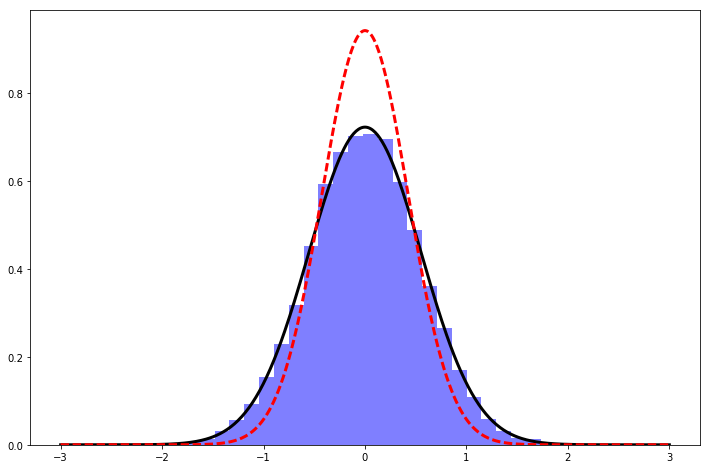

In [5]:
x = np.linspace(-3,3,512,endpoint=True)
plt.subplots(figsize = (12,8))
#plt.hist(sshot.ravel(),normed = 1, bins = 32, alpha = 0.5, histtype='stepfilled', linewidth = 3, color = 'b');
plt.hist(sshot[:,0],normed = 1, bins = 32, alpha = 0.5, histtype='stepfilled', linewidth = 3, color = 'b');
plt.plot(x,  system.rho1(x), linewidth = 3, color = 'k');
plt.plot(x,  system.conditonalP(x,0,2),'--', linewidth = 3, color = 'r');
#plt.plot(x,  system.conditonalP(x,0,3),':', linewidth = 3, color = 'g');
#plt.plot(x,  system.conditonalP(x,0,4),'--', linewidth = 3, color = 'm');